## Calculating the Return of a Portfolio of Securities

In [10]:
import numpy as np
import pandas as pd
! pip install pandas_datareader
import matplotlib.pyplot as plt
import data as wb

ModuleNotFoundError: No module named 'data'

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2002-1-1’ until today.

In [12]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [15]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2020-1-1')['Close']

In [16]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2019-12-31 to 2020-09-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      186 non-null    float64
 1   MSFT    186 non-null    float64
 2   F       186 non-null    float64
 3   GE      186 non-null    float64
dtypes: float64(4)
memory usage: 7.3 KB


Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [42]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2019-12-31,124.900002,157.699997,9.30,11.16
2020-01-02,123.410004,160.619995,9.42,11.93
2020-01-03,122.580002,158.619995,9.21,11.97
2020-01-06,122.750000,159.029999,9.16,12.14
2020-01-07,121.989998,157.580002,9.25,12.05


In [21]:
mydata.iloc[0]

PG      124.900002
MSFT    157.699997
F         9.300000
GE       11.160000
Name: 2019-12-31 00:00:00, dtype: float64

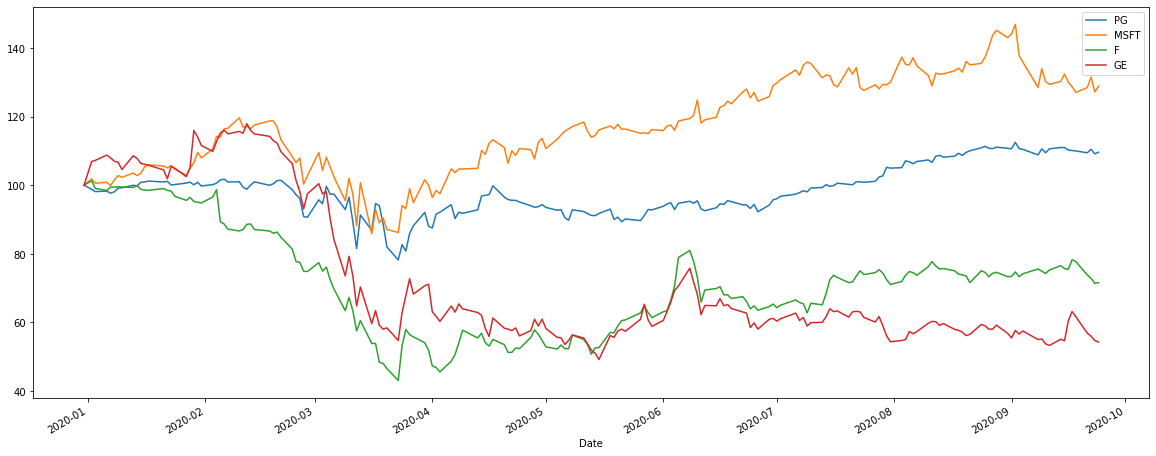

In [22]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (20, 8));
plt.show()

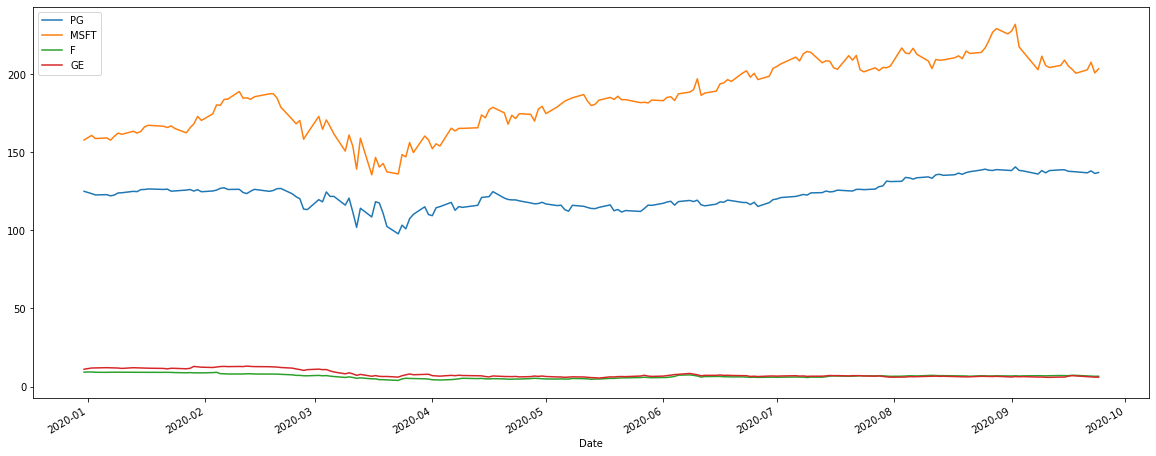

In [24]:
mydata.plot(figsize=(20,8))
plt.show()



### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [29]:
mydata.loc['2020-1-2']

PG      123.410004
MSFT    160.619995
F         9.420000
GE       11.930000
Name: 2020-01-02 00:00:00, dtype: float64

In [32]:
mydata.iloc[0]

PG      124.900002
MSFT    157.699997
F         9.300000
GE       11.160000
Name: 2019-12-31 00:00:00, dtype: float64

# Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [40]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-02,-0.011930,0.018516,0.012903,0.068996
2020-01-03,-0.006726,-0.012452,-0.022293,0.003353
2020-01-06,0.001387,0.002585,-0.005429,0.014202
2020-01-07,-0.006191,-0.009118,0.009825,-0.007414


In [43]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [44]:
np.dot(returns, weights)

array([        nan,  0.02212158, -0.00952936,  0.00318623, -0.00322435,
        0.0027656 ,  0.00549985, -0.00622229,  0.01421101, -0.00264474,
       -0.00185073,  0.00362327,  0.00116734, -0.0033412 , -0.00834007,
        0.00717556, -0.00732294, -0.01190188,  0.01416234,  0.02469684,
        0.00420954, -0.01239403,  0.00779758,  0.02142141, -0.01614587,
        0.00577858, -0.00828938,  0.00673524, -0.00954777,  0.00928844,
       -0.00217148, -0.0020781 , -0.00277472, -0.00339821, -0.00219436,
       -0.0176114 , -0.03558622, -0.03052836, -0.00835392, -0.05257844,
        0.01689003,  0.04681414, -0.03023196,  0.02812445, -0.04390554,
       -0.03314322, -0.08282682,  0.06151042, -0.06236311, -0.09869968,
        0.10008738, -0.11448416,  0.05879229, -0.0545926 , -0.01618995,
       -0.03462438, -0.04823471,  0.13240509,  0.03375494,  0.04366556,
       -0.02202081,  0.02969665, -0.02315748, -0.06099404,  0.00952619,
       -0.01385674,  0.06019524, -0.01036961,  0.03426004,  0.01

In [45]:
np.dot(returns, weights)

array([        nan,  0.02212158, -0.00952936,  0.00318623, -0.00322435,
        0.0027656 ,  0.00549985, -0.00622229,  0.01421101, -0.00264474,
       -0.00185073,  0.00362327,  0.00116734, -0.0033412 , -0.00834007,
        0.00717556, -0.00732294, -0.01190188,  0.01416234,  0.02469684,
        0.00420954, -0.01239403,  0.00779758,  0.02142141, -0.01614587,
        0.00577858, -0.00828938,  0.00673524, -0.00954777,  0.00928844,
       -0.00217148, -0.0020781 , -0.00277472, -0.00339821, -0.00219436,
       -0.0176114 , -0.03558622, -0.03052836, -0.00835392, -0.05257844,
        0.01689003,  0.04681414, -0.03023196,  0.02812445, -0.04390554,
       -0.03314322, -0.08282682,  0.06151042, -0.06236311, -0.09869968,
        0.10008738, -0.11448416,  0.05879229, -0.0545926 , -0.01618995,
       -0.03462438, -0.04823471,  0.13240509,  0.03375494,  0.04366556,
       -0.02202081,  0.02969665, -0.02315748, -0.06099404,  0.00952619,
       -0.01385674,  0.06019524, -0.01036961,  0.03426004,  0.01

In [46]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.190688
MSFT    0.460967
F      -0.263306
GE     -0.583446
dtype: float64

In [47]:
np.dot(annual_returns, weights)

-0.04877414180574796

In [53]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

-4.877 %


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [54]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

Transform the result into a percentage form. 

In [56]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

-4.877 %
19.198999999999998 %
